# **ĐỒ ÁN 1:**
# *Mô hình hồi quy tuyến tính và ứng dụng trong dự báo giá xe cũ.*

 **Họ và tên:** Vũ Thành Đạt

**MSSV:** 20206275

**Lớp:** Hệ thống thông tin 01 - K65

✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔✔

### **Import các thư viện**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import statsmodels.api as sm
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **BƯỚC 1: TIỀN XỬ LÝ DỮ LIỆU**

### **Tổng quan về bộ dữ liệu**

Bộ dữ liệu  sử dụng gồm có các đặc trưng sau:

• Brand: Tên thương hiệu của xe.

• Year: Năm sản xuất xe.

• Kilometers: Tổng số Km mà xe đã đi.

• Fuel: Loại nhiên liệu xe sử dụng.

• Transmission: Loại hộp số xe.

• Ower: Thứ tự chủ sở hữu cũ của xe.

• Mileage: Mức tiêu thụ nhiên liệu.

• Engine: Thể tích xylanh của động cơ.

• Power: Công suất tối đa.

• Seat: Số ghế ngồi của xe.

• Price: Giá bán của xe.

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car_price/used_cars_data (2).csv')
data

,Brand,Year,Kilometers,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price
0,Mercedes-Benz,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,30.00
1,BMW,2010,65329,Petrol,Automatic,First,7.94,4395.0,450.00,4.0,20.72
2,BMW,2011,5900,Petrol,Automatic,First,7.94,4395.0,450.00,4.0,47.50
3,Mercedes-Benz,2010,35000,Petrol,Automatic,First,8.10,5461.0,387.30,2.0,29.50
4,BMW,2013,49000,Diesel,Automatic,First,8.20,2993.0,245.00,4.0,29.00
...,...,...,...,...,...,...,...,...,...,...,...
5081,Maruti,2016,67000,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN
5082,Maruti,2015,58634,Diesel,Manual,First,28.40,1248.0,74.00,5.0,NaN
5083,Maruti,2017,14300,Diesel,Automatic,First,28.40,1248.0,73.75,5.0,NaN
5084,Mahindra,2016,50000,Electric,Automatic,First,NaN,72.0,41.00,5.0,13.00


* Thực hiện đổi biến năm sản xuất **Year** thành biến tuổi của xe **Ageofcar**. Bộ dữ liệu
được sử dụng về giá của các loại xe cũ phổ thông, không dự báo về giá của các loại xe cổ.

In [ ]:
data['Current_year']=2022
data['Ageofcar']=data['Current_year']-data['Year']
data.drop('Current_year',axis=1,inplace=True)
data.drop('Year',axis=1,inplace=True)
data.head()

,Brand,Kilometers,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Ageofcar
0,Mercedes-Benz,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.00,12
1,BMW,65329,Petrol,Automatic,First,7.94,4395.0,450.0,4.0,20.72,12
2,BMW,5900,Petrol,Automatic,First,7.94,4395.0,450.0,4.0,47.50,11
3,Mercedes-Benz,35000,Petrol,Automatic,First,8.10,5461.0,387.3,2.0,29.50,12
4,BMW,49000,Diesel,Automatic,First,8.20,2993.0,245.0,4.0,29.00,9


### **Mô tả về bảng dữ liệu**

In [ ]:
data.describe(include = 'all')

,Brand,Kilometers,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Ageofcar
count,5086,5.086000e+03,5086,5086,5086,5084.000000,5063.000000,4990.000000,5058.000000,4959.000000,5086.000000
unique,10,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Maruti,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN
freq,1257,NaN,2680,3690,4208,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.836126e+04,NaN,NaN,NaN,18.525744,1605.632431,111.837162,5.310399,9.270617,8.533032
std,NaN,9.759020e+04,NaN,NaN,NaN,4.224189,584.300268,50.975248,0.813991,10.227709,3.228193
min,NaN,1.710000e+02,NaN,NaN,NaN,7.810000,72.000000,34.200000,0.000000,0.450000,3.000000
25%,NaN,3.390025e+04,NaN,NaN,NaN,15.600000,1197.000000,75.000000,5.000000,3.650000,6.000000
50%,NaN,5.222200e+04,NaN,NaN,NaN,18.500000,1493.000000,91.100000,5.000000,5.750000,8.000000
75%,NaN,7.200000e+04,NaN,NaN,NaN,21.430000,1968.000000,136.000000,5.000000,9.950000,10.000000


Từ bảng mô tả dữ liệu ở trên ta có thể thấy được:

– Số lượng hàng có giá trị của các cột khác nhau do xuất hiện các giá trị
NULL nên ta cần xử lý mất mát của bộ dữ liệu này.

– Các cột **Brand, Fuel, Owner** là các cột có dự liệu không phải dạng số nên
ta cần đặt biến giả cho các giá trị trong các cột này.

– Các cột dữ liệu còn lại là các dữ liệu dạng số.

### **Xử lý giá trị NULL:**


In [ ]:
data.isnull().sum()

Brand             0
Kilometers        0
Fuel              0
Transmission      0
Owner             0
Mileage           2
Engine           23
Power            96
Seats            28
Price           127
Ageofcar          0
dtype: int64

Từ thống kê về các giá trị NULL ta thấy các giá trị mất mát không vượt
quá 5% của các cột dữ liệu nên ta có thể loại bỏ các giá trị này

Bộ dữ liệu sau khi loại bỏ các giá trị NULL:

In [ ]:
data.dropna(inplace = True)
data.reset_index(inplace = True)
data = data.drop(axis = 1, columns = 'index')
data

,Brand,Kilometers,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Ageofcar
0,Mercedes-Benz,35277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,30.00,12
1,BMW,65329,Petrol,Automatic,First,7.94,4395.0,450.00,4.0,20.72,12
2,BMW,5900,Petrol,Automatic,First,7.94,4395.0,450.00,4.0,47.50,11
3,Mercedes-Benz,35000,Petrol,Automatic,First,8.10,5461.0,387.30,2.0,29.50,12
4,BMW,49000,Diesel,Automatic,First,8.20,2993.0,245.00,4.0,29.00,9
...,...,...,...,...,...,...,...,...,...,...,...
4861,Maruti,39437,Diesel,Manual,First,28.40,1248.0,74.00,5.0,5.15,7
4862,Maruti,103000,Diesel,Manual,Second,28.40,1248.0,74.00,5.0,5.25,8
4863,Maruti,48000,Diesel,Manual,First,28.40,1248.0,73.75,5.0,6.00,5
4864,Maruti,27000,Diesel,Manual,First,28.40,1248.0,73.75,5.0,5.90,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4866 entries, 0 to 4865
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4866 non-null   object 
 1   Kilometers    4866 non-null   int64  
 2   Fuel          4866 non-null   object 
 3   Transmission  4866 non-null   object 
 4   Owner         4866 non-null   object 
 5   Mileage       4866 non-null   float64
 6   Engine        4866 non-null   float64
 7   Power         4866 non-null   float64
 8   Seats         4866 non-null   float64
 9   Price         4866 non-null   float64
 10  Ageofcar      4866 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 418.3+ KB


### **Các điểm ngoại lệ - OUTLIER**

Ta sử dụng trực quan các điểm ngoại lệ thông qua biểu đồ boxlpot để xem xét
các điểm ngoại lệ ảnh hưởng đến hiệu suất của mô hình.
Dựa trên đồ thị boxplot, ta xác định các giá trị nằm ngoài hai đường thẳng từ
hộp đến giá trị cao nhất và thấp nhất trong khoảng biến thiên. Các giá trị này
được coi là outlier.

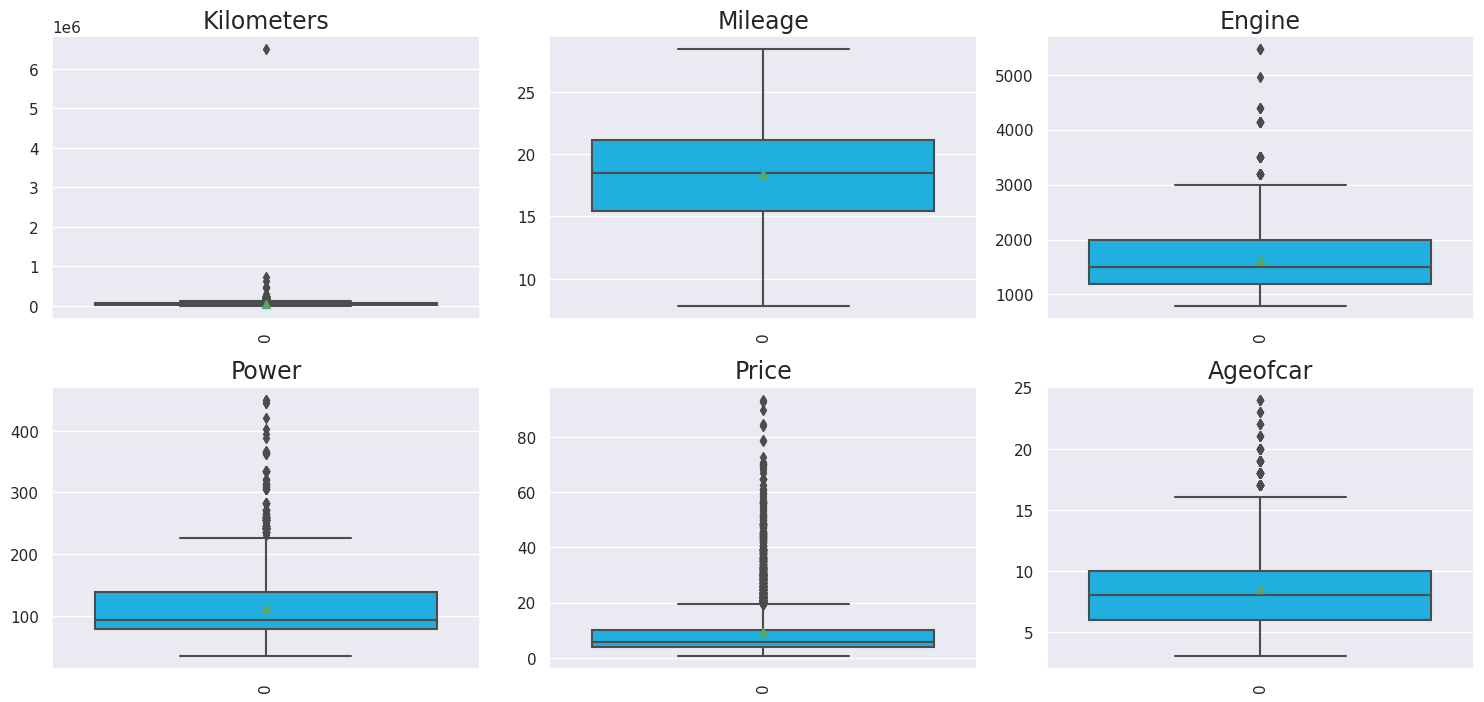

In [ ]:
numeric_columns = ['Kilometers', 'Mileage', 'Engine', 'Power', 'Price', 'Ageofcar']
plt.figure(figsize=(15,35))
for i in range(len(numeric_columns)):
    plt.subplot(10,3,i+1)
    sns.boxplot(data[numeric_columns[i]],showmeans=True, color='deepskyblue')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.title(numeric_columns[i],fontsize=17)

plt.show()

Từ đồ thị trên ta thấy các biến **Kilometers, Engine, Power, Price, Ageofcar**
xuất hiện nhiều các điểm ngoại lại, để tránh giảm hiệu suất mô hình dự đoán
ta cần loại bỏ các điểm ngoại lệ.

In [ ]:
def remove_outliers(df, col_list):
    for col in col_list:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_Whisker = Q1 - 1.5 * IQR
        Upper_Whisker = Q3 + 1.5 * IQR
        df = df[(df[col] >= Lower_Whisker) & (df[col] <= Upper_Whisker)]
    return df

numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col.remove('Seats')
numerical_col

['Kilometers', 'Mileage', 'Engine', 'Power', 'Price', 'Ageofcar']

In [ ]:
data = remove_outliers(data, numerical_col)
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['Kilometers', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Ageofcar']

Sau khi loại bỏ outlier bộ dữ liệu còn 3918 hàng.

In [ ]:
data.describe(include = 'all')

,Brand,Kilometers,Fuel,Transmission,Owner,Mileage,Engine,Power,Seats,Price,Ageofcar
count,3918,3918.000000,3918,3918,3918,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
unique,10,NaN,4,2,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Maruti,NaN,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN
freq,1086,NaN,2128,3223,3286,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52934.822614,NaN,NaN,NaN,19.125651,1453.740939,97.310240,5.266207,6.014191,8.392292
std,NaN,25913.918507,NaN,NaN,NaN,3.953435,433.823043,32.333991,0.730346,3.393573,2.863861
min,NaN,171.000000,NaN,NaN,NaN,9.000000,793.000000,34.200000,4.000000,0.690000,3.000000
25%,NaN,33431.250000,NaN,NaN,NaN,16.470000,1197.000000,74.000000,5.000000,3.500000,6.000000
50%,NaN,52000.000000,NaN,NaN,NaN,18.900000,1298.000000,88.500000,5.000000,5.250000,8.000000
75%,NaN,69918.000000,NaN,NaN,NaN,22.070000,1582.000000,117.300000,5.000000,7.540000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 12 to 4865
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3918 non-null   object 
 1   Kilometers    3918 non-null   int64  
 2   Fuel          3918 non-null   object 
 3   Transmission  3918 non-null   object 
 4   Owner         3918 non-null   object 
 5   Mileage       3918 non-null   float64
 6   Engine        3918 non-null   float64
 7   Power         3918 non-null   float64
 8   Seats         3918 non-null   float64
 9   Price         3918 non-null   float64
 10  Ageofcar      3918 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 367.3+ KB


### **Tạo biến giả**

– Với mỗi cột có m giá trị, ta cần tạo m-1 biến giả. Giá trị không được tạo
biến giả sẽ làm cơ sở.

∗ Cột **Brand**: giá trị ’Audi’ làm cơ sở, còn lại là biến giả.

∗ Cột **Fuel**: giá trị ’Diesel’ làm cơ cở.

∗ Cột **Transmission**: giá trị ’Automatic’ làm cơ sở.

∗ Cột **Owner**: giá trị ’First’ làm cơ sở.

In [ ]:
data_with_dummies = pd.get_dummies(data, drop_first=True)
data_with_dummies

,Kilometers,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand_BMW,Brand_Ford,Brand_Honda,...,Brand_Mercedes-Benz,Brand_Toyota,Brand_Volkswagen,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third
12,120000,9.00,2997.0,218.00,5.0,2.65,16,0,0,1,...,0,0,0,0,0,1,0,0,1,0
17,77000,9.70,1995.0,163.50,5.0,5.50,14,0,0,0,...,0,0,0,0,0,1,0,1,0,0
18,99100,9.74,1984.0,208.00,5.0,10.00,13,0,0,0,...,0,0,0,0,0,1,0,0,1,0
20,42000,9.80,2354.0,180.00,5.0,6.25,10,0,0,1,...,0,0,0,0,0,1,1,0,0,0
21,60000,9.80,2354.0,180.00,5.0,3.50,13,0,0,1,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,39437,28.40,1248.0,74.00,5.0,5.15,7,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4862,103000,28.40,1248.0,74.00,5.0,5.25,8,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4863,48000,28.40,1248.0,73.75,5.0,6.00,5,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4864,27000,28.40,1248.0,73.75,5.0,5.90,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
data_with_dummies

,Kilometers,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand_BMW,Brand_Ford,Brand_Honda,...,Brand_Mercedes-Benz,Brand_Toyota,Brand_Volkswagen,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Transmission_Manual,Owner_Fourth & Above,Owner_Second,Owner_Third
12,120000,9.00,2997.0,218.00,5.0,2.65,16,0,0,1,...,0,0,0,0,0,1,0,0,1,0
17,77000,9.70,1995.0,163.50,5.0,5.50,14,0,0,0,...,0,0,0,0,0,1,0,1,0,0
18,99100,9.74,1984.0,208.00,5.0,10.00,13,0,0,0,...,0,0,0,0,0,1,0,0,1,0
20,42000,9.80,2354.0,180.00,5.0,6.25,10,0,0,1,...,0,0,0,0,0,1,1,0,0,0
21,60000,9.80,2354.0,180.00,5.0,3.50,13,0,0,1,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,39437,28.40,1248.0,74.00,5.0,5.15,7,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4862,103000,28.40,1248.0,74.00,5.0,5.25,8,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4863,48000,28.40,1248.0,73.75,5.0,6.00,5,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4864,27000,28.40,1248.0,73.75,5.0,5.90,4,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
data_with_dummies.columns

Index(['Kilometers', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Ageofcar', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Toyota',
       'Brand_Volkswagen', 'Fuel_Diesel', 'Fuel_LPG', 'Fuel_Petrol',
       'Transmission_Manual', 'Owner_Fourth & Above', 'Owner_Second',
       'Owner_Third'],
      dtype='object')

### **Kiểm tra hiện tượng đa cộng tuyến:**

– Sử dụng ma trận tương quan kiểm tra hiện tượng đa cộng tuyến.

– Giữa 2 biến độc lập có hệ số tương quan |r| > 0.75 ta sẽ loại bỏ 1 trong 2
biến để tránh hiện tượng đa cộng tuyến. Biến chúng ta đang cần dự đoán
là biến Price nên ta sẽ loại bỏ biến độc lập có hệ số tương quan với Price
thấp hơn.

<Axes: >

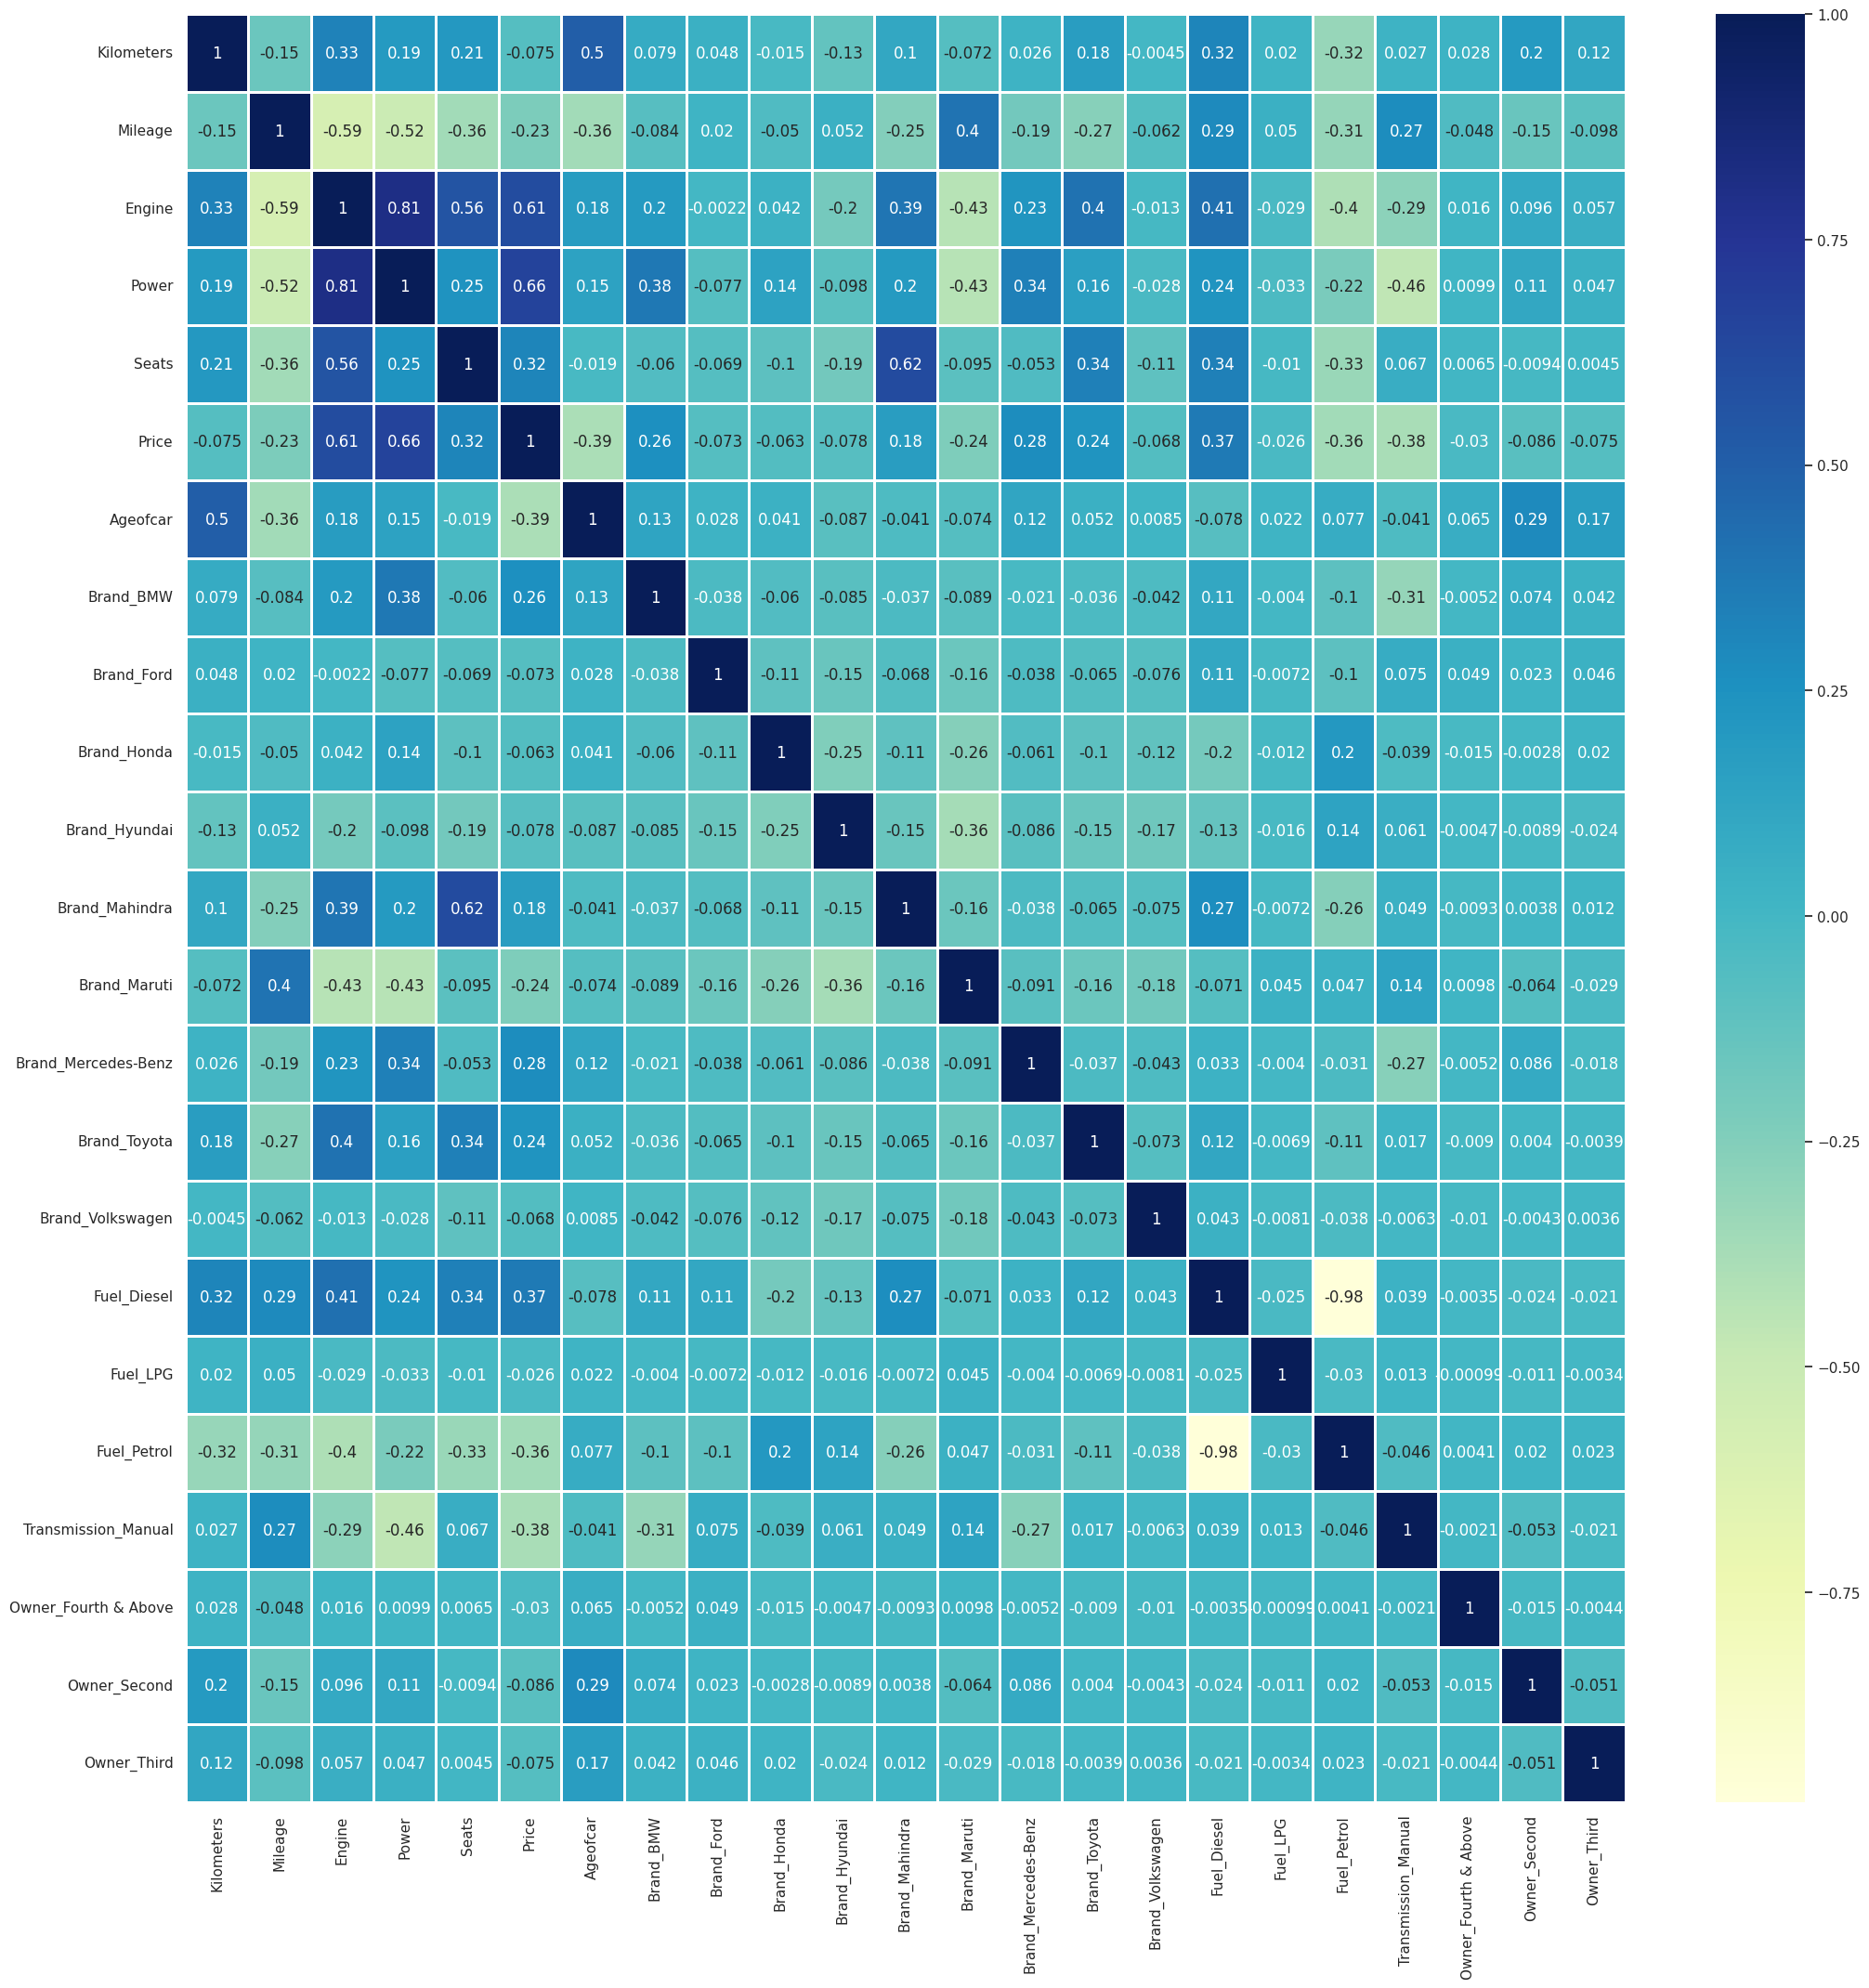

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
data_with_dummies.corr()
sns.heatmap(data_with_dummies.corr(), annot = True, linewidths = 2, ax = ax, cmap='YlGnBu')

Ta thấy có 2 cặp biến **Power - Engine** và **Fuel_Diesel - Fuel_Petrol**
có hệ số tương quan |r| > 0.75. Ta cần loại bỏ 1 trong 2 biến để tránh hiện
tượng đa cộng tuyến:

∗ Loại bỏ biến **Engine** vì biến **Engine** có hệ số tương quan với biến dự
đoán Price thấp hơn so với biến Power.

∗ Tương tự loại biến **Fuel_Diesel** ra khỏi mô hình.

In [ ]:
data_with_dummies.drop('Fuel_Diesel', axis=1, inplace=True)
data_with_dummies.drop('Engine', axis=1, inplace=True)


## **BƯỚC 2: XÂY DỰNG MÔ HÌNH**

### **Xem xét sự phụ thuộc của biến dự báo Price với các biến qua đồ thị phân tán:**

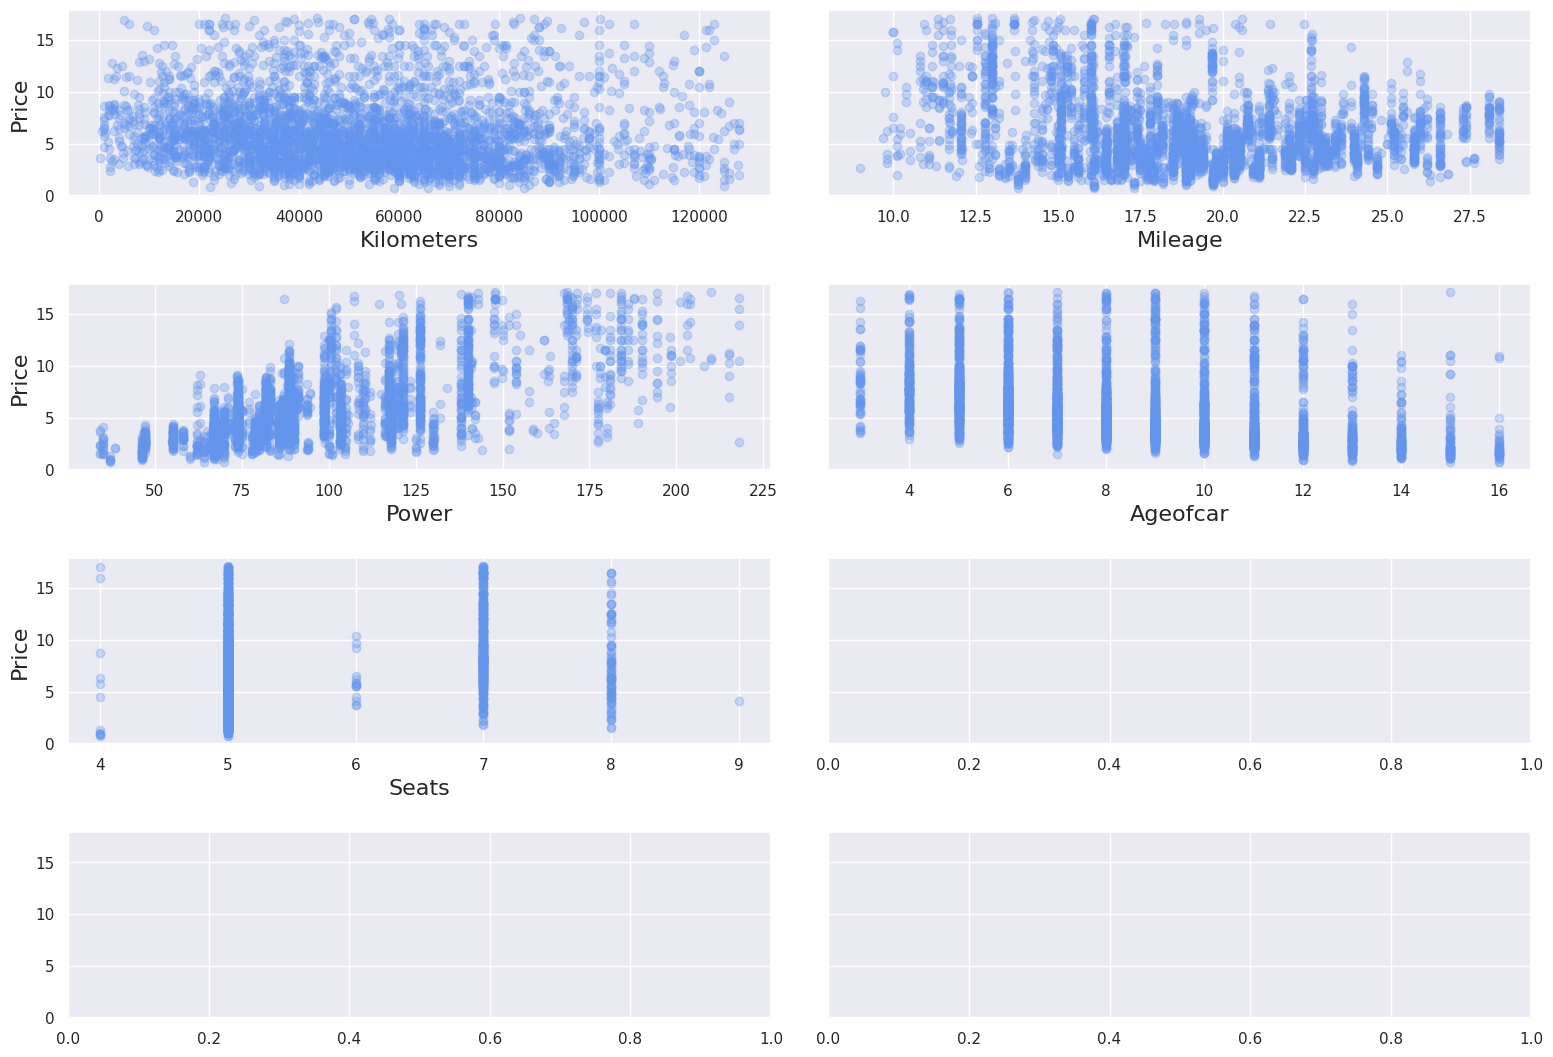

In [ ]:
ncols = 2
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
nrows = int(np.ceil(len(numeric_columns) / ncols))

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, figsize=(16,nrows*3))

row = 0
col = 0
numeric_columns = ['Kilometers','Mileage', 'Power','Ageofcar',  'Seats']

for idx in range(len(numeric_columns)):
    axs[row, col].scatter(data[numeric_columns[idx]], data['Price'], alpha=0.3, color='cornflowerblue')
    axs[row, col].set_xlabel(numeric_columns[idx], fontsize=16)
    if col == 0:
        axs[row, col].set_ylabel("Price", fontsize=16)
    col += 1
    if col % ncols == 0:
        col = 0
        row += 1

#plt.suptitle('Scatterplots of Numeric Variables vs. Price', fontsize=20)
plt.tight_layout(pad=2, rect=[0, 0.03, 1, 0.95])
plt.show()

Ta thấy dữ liệu trong các đồ thị có xu hướng tạo thành một đường cong
nên để đảm bảo tính tuyến tính ta sẽ tính giá trị *log*(**Price**) để đưa các đồ
thị về dạng đường thẳng.

In [ ]:
def Perform_log_transform(df,col_log):
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    df.info()
Perform_log_transform(data_with_dummies,['Price'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 12 to 4865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kilometers            3918 non-null   int64  
 1   Mileage               3918 non-null   float64
 2   Power                 3918 non-null   float64
 3   Seats                 3918 non-null   float64
 4   Price                 3918 non-null   float64
 5   Ageofcar              3918 non-null   int64  
 6   Brand_BMW             3918 non-null   uint8  
 7   Brand_Ford            3918 non-null   uint8  
 8   Brand_Honda           3918 non-null   uint8  
 9   Brand_Hyundai         3918 non-null   uint8  
 10  Brand_Mahindra        3918 non-null   uint8  
 11  Brand_Maruti          3918 non-null   uint8  
 12  Brand_Mercedes-Benz   3918 non-null   uint8  
 13  Brand_Toyota          3918 non-null   uint8  
 14  Brand_Volkswagen      3918 non-null   uint8  
 15  Fuel_LPG            

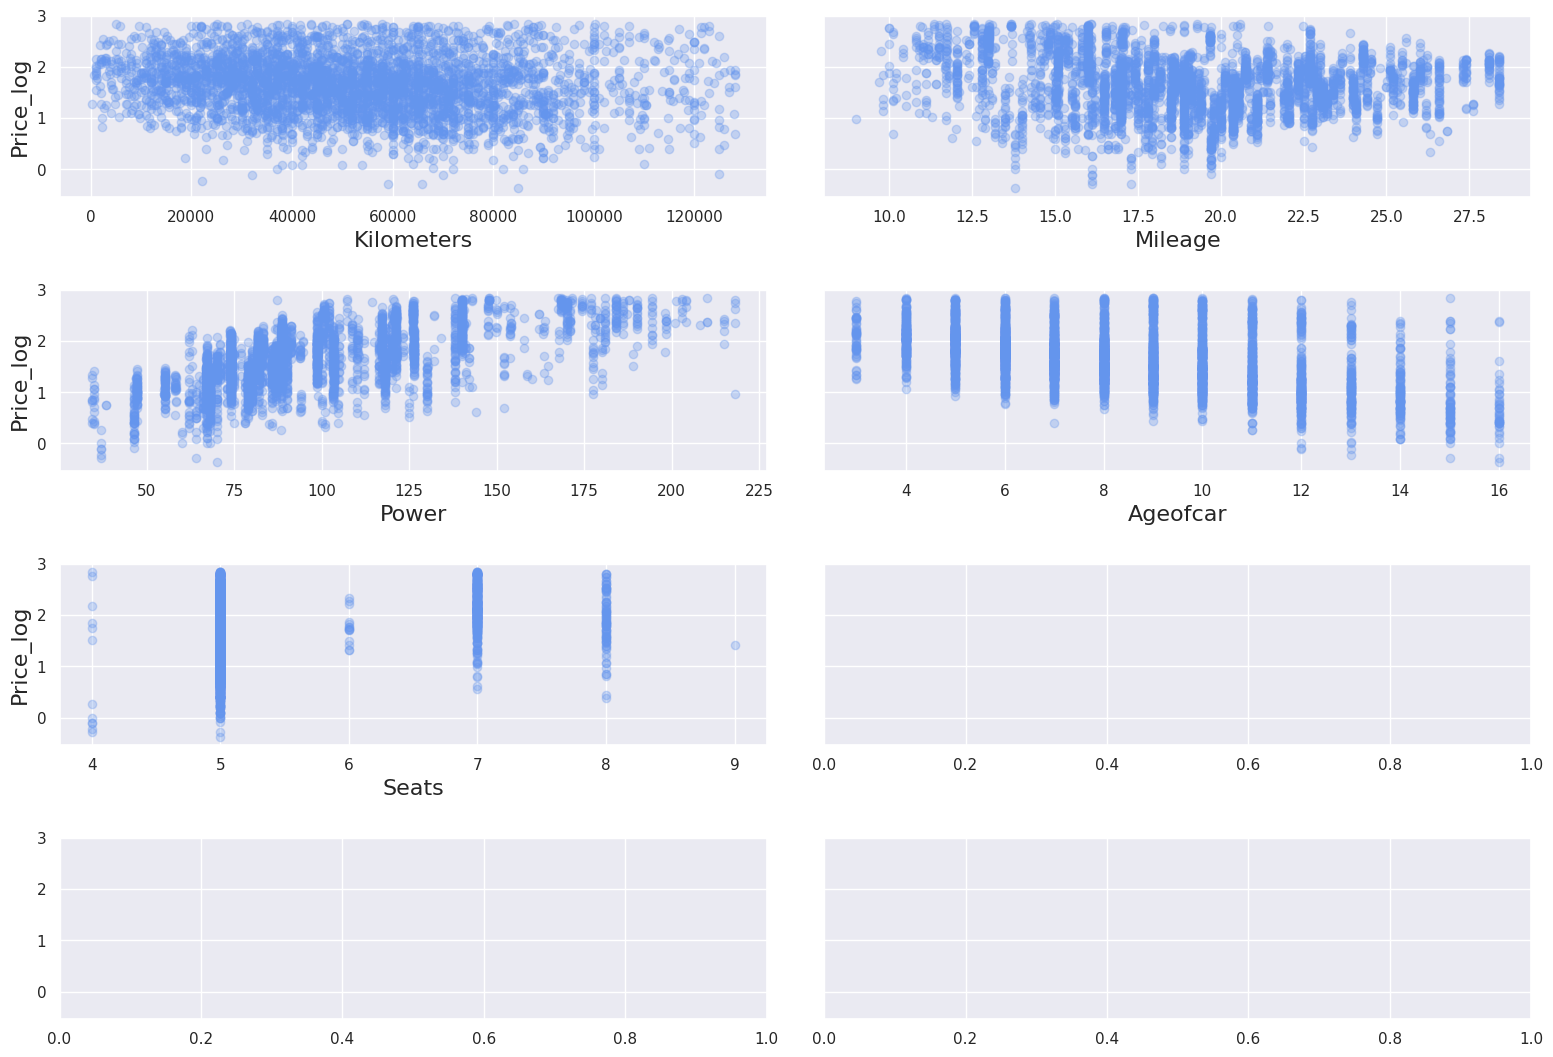

In [ ]:
ncols = 2
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
nrows = int(np.ceil(len(numeric_columns) / ncols))

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey=True, figsize=(16,nrows*3))

row = 0
col = 0
numeric_columns = ['Kilometers','Mileage', 'Power', 'Ageofcar', 'Seats']
for idx in range(len(numeric_columns)):
    axs[row, col].scatter(data[numeric_columns[idx]], data_with_dummies['Price_log'], alpha=0.3, color='cornflowerblue')
    axs[row, col].set_xlabel(numeric_columns[idx], fontsize=16)
    if col == 0:
        axs[row, col].set_ylabel("Price_log", fontsize=16)
    col += 1
    if col % ncols == 0:
        col = 0
        row += 1

#plt.suptitle('Scatterplots of Numeric Variables vs. Price', fontsize=20)
plt.tight_layout(pad=2, rect=[0, 0.03, 1, 0.95])
plt.show()

### **Xây dựng mô hình**

In [ ]:
from sklearn.model_selection import train_test_split
y = data_with_dummies['Price_log']
x = data_with_dummies[['Kilometers', 'Mileage', 'Power', 'Seats','Ageofcar', 'Brand_BMW', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Toyota', 'Brand_Volkswagen', 'Fuel_LPG', 'Fuel_Petrol',
       'Transmission_Manual', 'Owner_Fourth & Above', 'Owner_Second',
       'Owner_Third']]

 Chia bộ dữ liệu thành 2 phần tập train và test một cách ngẫu nhiên, với
tỷ lệ 80% cho tập train và 20% cho tập test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.reset_index()
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (3134, 20)
x_test: (784, 20)
y_train: (3134,)
y_test: (784,)


Xây dựng mô hình bằng phương pháp bình phương cực tiểu-OLS có sẵn
trong thư viện **statsmodels.api** với:

∗ X: ’Kilometers’, ’Mileage’, ’Power’, ’Seats’,’Ageofcar’, ’Brand_BMW’,
’Brand_Ford’, ’Brand_Honda’, ’Brand_Hyundai’, ’Brand_Mahindra’,
’Brand_Maruti’, ’Brand_Mercedes-Benz’, ’Brand_Toyota’, ’Brand_Volkswagen’,’Fuel_LPG’, ’Fuel_Petrol’, ’Transmission_Manual’, ’Owner_Fourth&Above’,
’Owner_Second’, ’Owner_Third’.

∗ Y: ’Price_log’

In [ ]:
x_train_ac = sm.add_constant(x_train)
x_test_ac = sm.add_constant(x_test)

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train, x_train_ac)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     782.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:37:47   Log-Likelihood:                 209.18
No. Observations:                3134   AIC:                            -376.4
Df Residuals:                    3113   BIC:                            -249.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3452 

Ta thấy giá trị $R^2$ = 0.834 và $R^2$ - hiệu chỉnh = 0.833 nên mô hình của
chúng ta khá phù hợp với bộ dữ liệu.

Các hệ số β tương ứng với các biến ước lượng được. Biến phụ thuộc là
log(Price).

In [ ]:
bias = [result.params[i] for i in range(len(result.params))]
bias_name = result.params.index.tolist()
b_dict = {'Name': bias_name, 'B': bias}
b = pd.DataFrame(b_dict)
b

,Name,B
0,const,2.345217e+00
1,Kilometers,-6.220392e-07
2,Mileage,-1.539118e-02
3,Power,8.615465e-03
4,Seats,7.681353e-02
5,Ageofcar,-1.189824e-01
6,Brand_BMW,-1.815620e-01
7,Brand_Ford,-4.718577e-01
8,Brand_Honda,-4.305697e-01
9,Brand_Hyundai,-4.065416e-01


### **Kiểm tra sai số của mô hình:**

– Từ mô hình với hệ số β vừa tính được và sử dụng bộ dữ liệu train, ta sẽ đi
dự đoán giá của xe. Từ đó ta tính các phần dư theo công thức:

e = y_train − y_train_predict

– Trong đó:

∗ y_train: Giá thực tế của bộ dữ liệu train.

∗ y_train_predict: Giá dự đoán của bộ dữ liệu train.


In [ ]:
y_train_predict = result.predict(x_train_ac)

In [ ]:
residual = y_train - y_train_predict

Đồ thị phân phối của phần dư:

<ipython-input-50-e5205b882aa1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, color='skyblue', hist_kws={'linewidth': 2, 'alpha': 0.7}, kde_kws={'linewidth': 2, 'color': 'deepskyblue'})


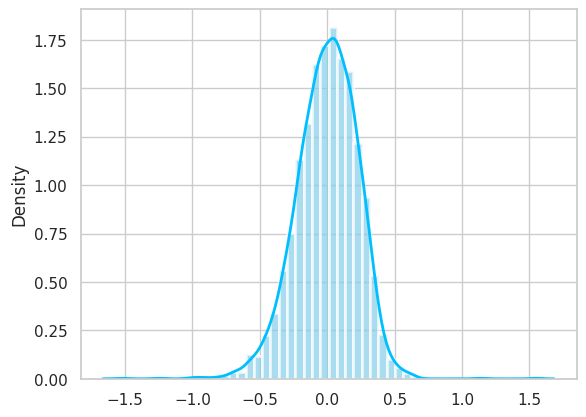

In [ ]:
sns.set_style("whitegrid")
sns.distplot(residual, color='skyblue', hist_kws={'linewidth': 2, 'alpha': 0.7}, kde_kws={'linewidth': 2, 'color': 'deepskyblue'})
#plt.title("Phân phối xác suất phần dư")
#plt.xlabel("Residual values")
plt.ylabel("Density")
plt.show()

=> Đồ thị phân phối xấp xỉ phân phối chuẩn

Kiểm tra kỳ vọng sai số bằng 0

In [ ]:
residual= result.resid
np.mean(residual)

1.4706933820104392e-13

Kiểm tra hiện tượng tự tương quan

In [ ]:
dw_test_results = sm.stats.stattools.durbin_watson(result.resid)
print("DW = ", dw_test_results)

DW =  2.008106891649495


Như vậy, mô hình thỏa mãn các giả định cần thiết của phương pháp ước lượng bình
phương cực tiểu.

## **BƯỚC 3: ĐÁNH GIÁ MÔ HÌNH**

Ta sử dụng bộ dữ liệu test để đánh giá mô hình.


In [ ]:
y_test_predict = result.predict(x_test_ac)

In [ ]:
y_test.describe(include = 'all')

count    784.000000
mean       1.645686
std        0.571451
min       -0.287682
25%        1.252763
50%        1.648659
75%        2.034706
max        2.838493
Name: Price_log, dtype: float64

Từ mô hình với các giá trị β vừa tính được ta sẽ tính giá trị dự báo của bộ dữ
liệu test và biểu diễn trên đồ thị:

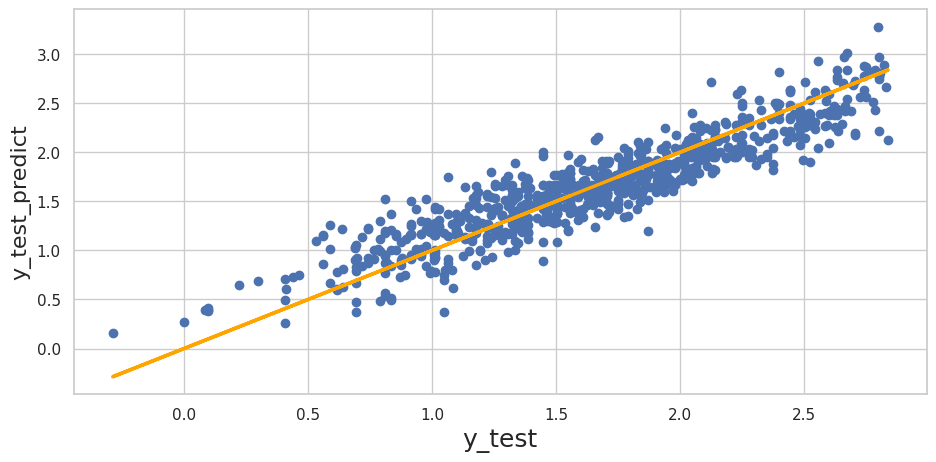

In [ ]:
fig = plt.figure(figsize=(11,5))
plt.scatter(y_test,y_test_predict)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_predict', fontsize=16)

#Đường tuyến tính x = y
f = lambda x: x

# x values of line to plot
x = np.array(y_test)

# plot fit
plt.plot(x,f(x),lw=2.5, c="orange")

Trong đó:

– Trục tung là giá trị dự đoán sử dụng mô hình đã ước lượng trên bộ dữ liệu
test.

– Trục hoành là giá trị thực tế.

– Đường màu cam là đường y_test = y_test_predict.

### **Nhận xét:**

– Ta thấy mô hình của chúng ta dự đoán khá đúng với các xe có giá ở
mức trung bình do các điểm tập trung sát và dày đặc quanh đường thẳng
y_test = y_test_predict.

– Đối với các xe có giá thấp và cao, mô hình có vẻ dự đoán không tốt do các
điểm có xu hướng phân tán qua đường y_test = y_test_predict..

Tiến hành xem xét cụ thể qua sai số và tỷ lệ phần trăm sai lệch:

In [ ]:
df_predict = pd.DataFrame(np.exp(y_test_predict), columns = ['Dự báo'])
df_predict['Thực tế'] = np.exp(y_test)
df_predict = df_predict.reset_index(drop= True)
df_predict['Phần dư'] = df_predict['Thực tế'] - df_predict['Dự báo']
df_predict['Chênh lệch %'] = (df_predict['Thực tế'] / df_predict['Dự báo']-1) * 100
df_predict

,Dự báo,Thực tế,Phần dư,Chênh lệch %
0,4.847480,4.75,-0.097480,-2.010932
1,4.653163,4.25,-0.403163,-8.664271
2,8.706984,8.50,-0.206984,-2.377220
3,9.767659,8.01,-1.757659,-17.994679
4,3.703383,3.75,0.046617,1.258755
...,...,...,...,...
779,4.638329,4.70,0.061671,1.329588
780,10.868810,13.00,2.131190,19.608306
781,1.840012,1.51,-0.330012,-17.935302
782,4.866609,3.82,-1.046609,-21.505922


In [ ]:
df_predict['Thực tế'] = np.exp(y_test)
df_predict = df_predict.reset_index(drop= True)
df_predict['Phần dư'] = df_predict['Thực tế'] - df_predict['Dự báo']
df_predict['Chênh lệch %'] = (df_predict['Thực tế'] / df_predict['Dự báo']-1) * 100
df_predict.sort_values(by = ['Chênh lệch %'])

,Dự báo,Thực tế,Phần dư,Chênh lệch %
433,7.726750,1.75,-5.976750,-77.351408
147,11.985602,2.80,-9.185602,-76.638636
515,9.782741,2.65,-7.132741,-72.911477
732,7.672662,2.75,-4.922662,-64.158464
466,15.899827,6.00,-9.899827,-62.263740
...,...,...,...,...
779,4.638329,NaN,NaN,NaN
780,10.868810,NaN,NaN,NaN
781,1.840012,NaN,NaN,NaN
782,4.866609,NaN,NaN,NaN


### **Nhận xét:**

∗ Sự chênh lệch lớn nhất là 104,57%, mô hình dự báo giá thấp hơn hơn
khoảng 2 lần so với thực tế.

∗ Sự chênh lệch nhỏ nhất là -51,035%, mô hình dự báo giá cao hơn khoảng
1,5 lần so với thực tế.

Sự sai lệch này xuất hiện do một số yếu tố thực tế mà chưa đưa vào mô
hình như: thị trường xe cũ, yếu tố cung cầu khi nghiên cứu, giá xe mới, chi
phí thuế và một số chi phí khác,...

## **Kết luận:**

• Mô hình dự báo giá xe cũ bằng phương pháp bình phương cực tiểu với hệ số
xác định $R^2$ = 0.834, khá cao và thỏa mãn các giả thiết mà phương pháp đặt
ra .Từ đó cho thấy đây là một mô hình khá phù hợp để dự báo giá xe ô tô cũ.

• Mô hình có thể đưa thêm một số yếu tố để dự đoán hoặc tăng kích thước mẫu
điều tra để cải thiện độ chính xác cả mô hình.